# Capacity vs voltage

In [1]:
import cellpy
from cellpy.utils import example_data

<div class="admonition hint">
    <p class="admonition-title">Hint</p>
    <p>
    If you have <code class="docutils literal notranslate"><span class="pre">plotly</span></code> installed, some of the functions will produce interactive plots. If not, the output will be simpler <code class="docutils literal notranslate"><span class="pre">matplotlib</span></code> figures. If you have not installed <code class="docutils literal notranslate"><span class="pre">plotly</span></code>, you can do so by running <code class="docutils literal notranslate"><span class="pre">pip install plotly</span></code>.
    </p>
</div>

In [2]:
import plotly.express as px

In [3]:
# Comment out this when running the notebook locally to get interactive plots
import plotly.io as pio
pio.renderers.default = "png"

Load the data:

In [4]:
c = example_data.cellpy_file()

  0%|          | 0.00/9.25M [00:00<?, ?B/s]

Get the number of cycles in the test:

In [5]:
c.get_number_of_cycles()

304

## Get capacities
### The basics
The capacities for selected cycles can be extracted using the `get_cap` method:

In [6]:
cap = c.get_cap(cycle=[7, 8, 9])
cap.head(2)

,voltage,capacity
5088,0.850685,0.002657
5089,0.845150,0.029224


In its simplest form, this returns a pandas DataFrame, containing the voltage and capacity for the selected cycles.

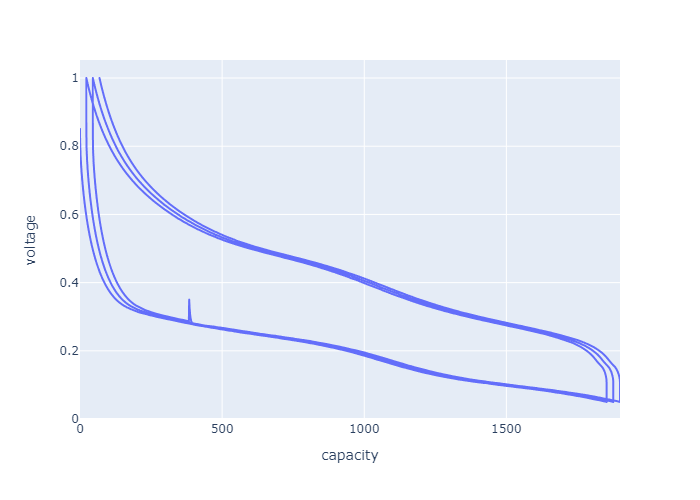

In [7]:
px.line(cap, x="capacity", y="voltage")

Several additional options are available to include more info to the resulting dataframe, e.g., including a column for cycle number (`label_cycle_number=True`) or adding a column indicating charge or discharge (`categorical_column=True`), as well as interpolation:

In [8]:
cap1 = c.get_cap(cycle=[1, 2, 3], label_cycle_number=True, categorical_column=True, interpolated=True, number_of_points=80, interpolate_along_cap=True)

In [9]:
cap1.head(2)

,cycle,capacity,voltage,direction
0,1,0.000652,2.954229,-1
1,1,29.363975,1.056753,-1


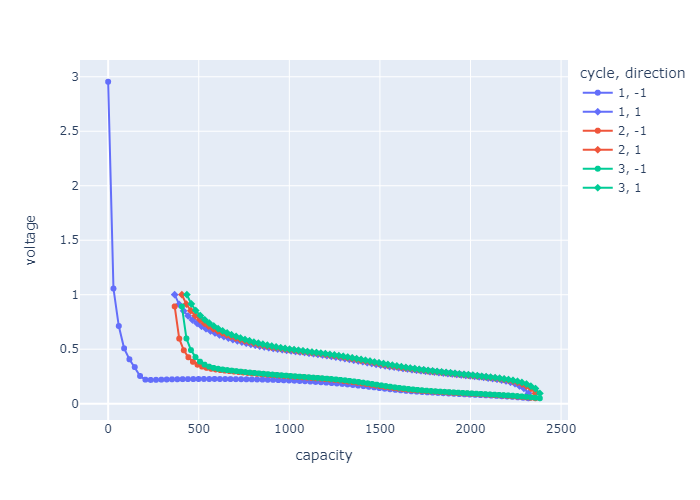

In [10]:
px.line(cap1, x="capacity", y="voltage", color="cycle", symbol="direction")

### Different methods for extracting capacities
Another useful option when extracting the capacities it the 'method' argument that allows for the following keywords:
- **back-and-forth**: standard back and forth; discharge (or charge) reversed from where charge (or discharge) ends.
- **forth**: discharge (or charge) continues along x-axis
- **forth-and-forth**: discharge (or charge) also starts at 0 (or shift if not shift=0.0).

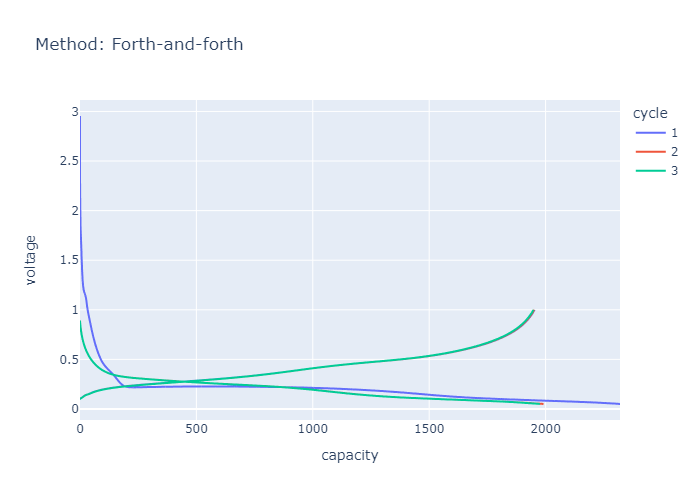

In [11]:
cap2 = c.get_cap(cycle=[1, 2, 3], label_cycle_number=True, categorical_column=True,method='forth-and-forth')
px.line(cap2, x="capacity", y="voltage", color="cycle",title='Method: Forth-and-forth')

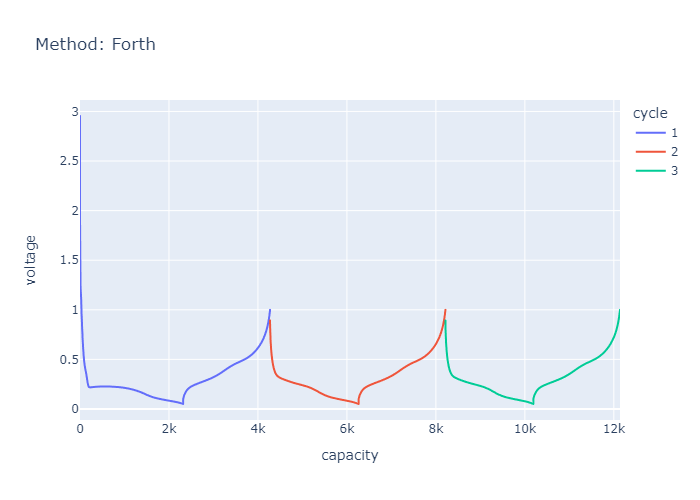

In [12]:
cap3 = c.get_cap(cycle=[1, 2, 3], label_cycle_number=True, categorical_column=True,method='forth')
px.line(cap3, x="capacity", y="voltage", color="cycle",title='Method: Forth')

### More details on get_cap
(from the source code)

```python
def get_cap(
        self,
        cycle=None,
        cycles=None,
        method="back-and-forth",
        insert_nan=None,
        shift=0.0,
        categorical_column=False,
        label_cycle_number=False,
        split=False,
        interpolated=False,
        dx=0.1,
        number_of_points=None,
        ignore_errors=True,
        dynamic=False,
        inter_cycle_shift=True,
        interpolate_along_cap=False,
        capacity_then_voltage=False,
        mode="gravimetric",
        mass=None,
        area=None,
        volume=None,
        cycle_mode=None,
        **kwargs,
    ):
        """Gets the capacity for the run.

        Args:
            cycle (int, list): cycle number (s).
            cycles (list): list of cycle numbers.
            method (string): how the curves are given
                "back-and-forth" - standard back and forth; discharge
                (or charge) reversed from where charge (or discharge) ends.
                "forth" - discharge (or charge) continues along x-axis.
                "forth-and-forth" - discharge (or charge) also starts at 0
                (or shift if not shift=0.0)
            insert_nan (bool): insert a np.nan between the charge and discharge curves.
                Defaults to True for "forth-and-forth", else False
            shift: start-value for charge (or discharge) (typically used when
                plotting shifted-capacity).
            categorical_column: add a categorical column showing if it is
                charge or discharge.
            label_cycle_number (bool): add column for cycle number
                (tidy format).
            split (bool): return a list of c and v instead of the default
                that is to return them combined in a DataFrame. This is only
                possible for some specific combinations of options (neither
                categorical_column=True or label_cycle_number=True are
                allowed).
            interpolated (bool): set to True if you would like to get
                interpolated data (typically if you want to save disk space
                or memory). Defaults to False.
            dx (float): the step used when interpolating.
            number_of_points (int): number of points to use (over-rides dx)
                for interpolation (i.e. the length of the interpolated data).
            ignore_errors (bool): don't break out of loop if an error occurs.
            dynamic: for dynamic retrieving data from cellpy-file.
                [NOT IMPLEMENTED YET]
            inter_cycle_shift (bool): cumulative shifts between consecutive
                cycles. Defaults to True.
            interpolate_along_cap (bool): interpolate along capacity axis instead
                of along the voltage axis. Defaults to False.
            capacity_then_voltage (bool): return capacity and voltage instead of
                voltage and capacity. Defaults to False.
            mode (string): 'gravimetric', 'areal', 'volumetric' or 'absolute'. Defaults
                to 'gravimetric'.
            mass (float): mass of active material (in set cellpy unit, typically mg).
            area (float): area of electrode (in set cellpy units, typically cm2).
            volume (float): volume of electrode (in set cellpy units, typically cm3).
            cycle_mode (string): if 'anode' the first step is assumed to be the discharge,
                else charge (defaults to CellpyCell.cycle_mode).
            **kwargs: sent to get_ccap and get_dcap.

        Returns:
            pandas.DataFrame ((cycle) voltage, capacity, (direction (-1, 1)))
            unless split is explicitly set to True. Then it returns a tuple
            with capacity and voltage.
```